<a href="https://colab.research.google.com/github/carlos-alves-one/-Amazon-Review-NLP/blob/main/Sentiment_Analysis_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Goldsmiths University of London
### MSc. Data Science and Artificial Intelligence
### Module: Natural Language Processing
### Author: Carlos Manuel De Oliveira Alves
### Student: cdeol003
### Coursework Project

# Data Collection

### Load the data

In [1]:
# Imports the 'drive' module from 'google.colab' and mounts the Google Drive to
# the '/content/drive' directory in the Colab environment.
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Dataset source: https://www.kaggle.com/datasets/akudnaver/amazon-reviews-dataset

License: Unknown

In [2]:
# Import the pandas library and give it the alias 'pd' for data manipulation and analysis
import pandas as pd

# Load the dataset Amazon Review Details from Google Drive
data_path = '/content/drive/MyDrive/amazon_project/amazon-review-details.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataframe
data.head(3).T


,0,1,2
report_date,2019-01-02,2019-01-03,2019-01-03
online_store,FRESHAMAZON,FRESHAMAZON,FRESHAMAZON
upc,8718114216478,5000184201199,5000184201199
retailer_product_code,B0142CI6FC,B014DFNNRY,B014DFNNRY
brand,Dove Men+Care,Marmite,Marmite
category,Personal Care,Foods,Foods
sub_category,Deos,Savoury,Savoury
product_description,Dove Men+Care Extra Fresh Anti-perspirant Deod...,Marmite Spread Yeast Extract 500g,Marmite Spread Yeast Extract 500g
review_date,2019-01-01,2019-01-02,2019-01-02
review_rating,5,5,4


# Data Preprocessing

The dataset contains multiple columns, but for our sentiment analysis, we will primarily focus on the 'review_rating' as our target variable and the text of the reviews for our feature.

**Tasks :**

- Select relevant columns ('review_rating' and the review text column).

- Handle missing values if necessary.

- Convert ratings to a binary sentiment (positive or negative).

- Preprocess the text data (tokenization, lowercasing, removing stop words, etc.).


## Import Libraries and Packages

In [3]:
# Importing the 'stopwords' collection from the nltk.corpus module
from nltk.corpus import stopwords

# Imports the regular expression module for pattern matching in strings
import re

# Importing the 'word_tokenize' and 'sent_tokenize' functions from nltk.tokenize for tokenizing strings into words
from nltk.tokenize import word_tokenize, sent_tokenize

# Importing the nltk module, which is a suite of libraries for natural language processing
import nltk

# Downloading the 'punkt' tokenizer models, used by nltk for sentence tokenization
nltk.download('punkt')

# Downloading the 'stopwords' dataset, which contains lists of common stopwords in various languages
nltk.download('stopwords')

# Importing lemmatizer and stemmer for text normalization
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Importing WordNet, a lexical database for the English language
from nltk.corpus import wordnet

# Import Word2Vec model from gensim library
from gensim.models import Word2Vec

# Import NumPy for numerical and array operations
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Function for Cleaning & Preprocessing

In [4]:
# Declare function for data cleaning and preprocessing
def preprocess_text(text):

    # Lowercasing
    text = text.lower()

    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Returns a string where all elements in the list 'tokens'
    # are concatenated into a single string, separated by spaces
    return ' '.join(tokens)


## Preprocessing the Review Text

In [5]:
# Apply preprocessing to the review text
data['processed_reviews'] = data['review_text'].apply(preprocess_text)


## Create Column Binary Sentiment

In [6]:
# Convert ratings to binary sentiment
data['sentiment'] = data['review_rating'].apply(lambda x: 1 if x > 3 else 0)


## Display Columns Preprocessed

In [7]:
# Set the display option for max column width
pd.set_option('display.max_colwidth', None)

# Display the columns relevant to check results
print(data[['review_rating', 'review_text', 'processed_reviews', 'sentiment']].head(3).T)


                                                                                                                                                                                                                            0  \
review_rating                                                                                                                                                                                                               5   
review_text        As you get older, you know what you like and what is suitable for your body. I like all Dove products. Gives you that fresh all over, wide awake feeling and no dandruff or flakey skin. No smelly a/pits!   
processed_reviews                                                                                       get older know like suitable body like dove products gives fresh wide awake feeling dandruff flakey skin smelly apits   
sentiment                                                                                           

The displayed results from the dataset reveal that the preprocessing steps effectively distilled key sentiment-related content from the original reviews, with all three examples showing high review ratings indicative of positive sentiments. The processed reviews retain critical information, focusing on aspects directly related to user experiences and satisfaction, while extraneous details are omitted. Sentiment labels consistently assigned as `1` align with the positive nature of the review ratings and the processed texts, indicating a successful preprocessing and sentiment labelling effort. This suggests that the data is well-prepared for further sentiment analysis tasks, with the preprocessing ensuring that models or analyses are based on relevant, succinct representations of the original reviews, accurately reflecting their positive sentiments.

## Extensive Data Inspection

### Check Missing Values

> Check for missing values or inconsistent data entries

In [8]:
# Checking for missing values in 'review_rating' and 'review_text' columns
missing_values = data[['review_rating', 'review_text']].isnull().sum()

# Printing results in an aligned manner
print("Missing values in selected columns:")
for column, value in missing_values.items():
    print(f"{column:15}= {value}")


Missing values in selected columns:
review_rating  = 0
review_text    = 0


The analysis confirms that the `review_rating` and `review_text` columns have no missing values, a crucial advantage for sentiment analysis. This completeness ensures the dataset is ready for sentiment analysis without needing data imputation or streamlining preprocessing like text cleaning and tokenization. It provides a solid model training and evaluation foundation, enhancing analysis reliability. The absence of missing values in these key columns simplifies project workflows and focuses on core analytical and modelling tasks.

In [9]:
# Assuming 'review_rating' should be between 1 and 5
# Checking for any ratings outside this range
invalid_ratings = data[(data['review_rating'] < 1) | (data['review_rating'] > 5)]

# Printing only the relevant columns: 'review_text' and 'review_rating'
print("Invalid ratings:\n", invalid_ratings[['review_text', 'review_rating']])


Invalid ratings:
 Empty DataFrame
Columns: [review_text, review_rating]
Index: []


The `review_rating` column analysis reveals that all ratings fall within the expected range of 1 to 5, indicating no invalid ratings in the dataset. This finding underscores the high quality of the dataset regarding rating data integrity. It eliminates the need for data cleaning steps for correcting or removing out-of-range ratings. Consequently, the dataset is well-prepared for further processing and analysis, particularly sentiment analysis, where these ratings can be directly utilized or transformed into categorical sentiment labels. This ensures a reliable foundation for the project's analytical and modelling endeavours.

### Data Distribution

> Explore data distribution, such as the number of positive vs negative reviews.

In [10]:
# Define positive (e.g., ratings 4 and 5) and negative (e.g., ratings 1 and 2) reviews
data['review_sentiment'] = data['review_rating'].apply(lambda x: 'Positive' if x > 3 else ('Negative' if x < 3 else 'Neutral'))

# Count the number of positive vs. negative reviews
sentiment_distribution = data['review_sentiment'].value_counts()

print(sentiment_distribution)


Positive    2167
Negative     227
Neutral      107
Name: review_sentiment, dtype: int64


The dataset analyzed shows a dominant number of positive reviews (2,167) compared to negative (227) and neutral (107) reviews, indicating a general customer satisfaction or potential review collection bias. Positive reviews significantly outweigh negative and neutral ones, suggesting clear sentiment trends among reviewers, with few adopting a neutral stance. This imbalance highlights the importance of considering data diversity in sentiment analysis to avoid model biases toward positive outcomes.

## Text Normalization


### Lemmatization and Stemming

- Adding lemmatization and stemming. Lemmatization converts a word to its base form with a proper dictionary meaning, whereas stemming trims words to their root form, which might not be a valid word itself.

In [11]:
# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')  # Make sure WordNet is up-to-date
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [12]:
# Initialize the Lemmatizer and Stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()


In [13]:
# Defines a function to map NLTK part-of-speech tags to WordNet part-of-speech tags
def nltk_tag_to_wordnet_tag(nltk_tag):

    if nltk_tag.startswith('J'):
        return wordnet.ADJ
        # If the tag starts with 'J', it's an adjective in NLTK, so return the WordNet tag for adjective

    elif nltk_tag.startswith('V'):
        return wordnet.VERB
        # If the tag starts with 'V', it's a verb, so return the WordNet tag for verb

    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
        # If the tag starts with 'N', it's a noun, so return the WordNet tag for noun

    elif nltk_tag.startswith('R'):
        return wordnet.ADV
        # If the tag starts with 'R', it's an adverb, so return the WordNet tag for adverb

    else:
        return None
        # If the NLTK tag doesn't start with J, V, N, or R, return None as it doesn't match any WordNet tag categories


In [14]:
# Defines a function to lemmatize each word in a sentence
def lemmatize_sentence(sentence):

    words = word_tokenize(sentence)
    # Tokenizes the sentence into individual words

    lemmatized_words = []
    # Initializes an empty list to store the lemmatized words

    for word, tag in nltk.pos_tag(words):
        # Loops through each word and its part-of-speech tag

        wordnet_tag = nltk_tag_to_wordnet_tag(tag)
        # Converts the POS tag into a WordNet POS tag

        if wordnet_tag is None:
            # If there's no corresponding WordNet tag, keep the word as is
            lemmatized_words.append(word)
        else:
            # If there is a corresponding WordNet tag, lemmatize the word
            lemmatized_words.append(lemmatizer.lemmatize(word, wordnet_tag))

    return ' '.join(lemmatized_words)
    # Joins the list of lemmatized words into a single string and returns it


In [15]:
# Defines a function to stem each word in a sentence
def stem_sentence(sentence):

    words = word_tokenize(sentence)
    # Tokenizes the sentence into individual words

    stemmed_words = [stemmer.stem(word) for word in words]
    # Uses a list comprehension to apply the stemmer to each word in the list of words

    return ' '.join(stemmed_words)
    # Joins the list of stemmed words into a single string and returns it


In [16]:
# Apply Lemmatization and Stemming to the review_text column
data['lemmatized_review'] = data['review_text'].apply(lemmatize_sentence)
data['stemmed_review'] = data['review_text'].apply(stem_sentence)

# Display the first few rows to verify
print(data[['review_text', 'lemmatized_review', 'stemmed_review']].head())


                                                                                                                                                                                                  review_text  \
0  As you get older, you know what you like and what is suitable for your body. I like all Dove products. Gives you that fresh all over, wide awake feeling and no dandruff or flakey skin. No smelly a/pits!   
1                             Three gigantic marmite jars that will last probably a whole life! What else would you possibly wish for? Order came in time, when mentioned, safely packed. Very happy with it.   
2                                                                                                                                                                                                   Excellent   
3                                                                                                                                                                  A

The results demonstrate the application of lemmatization and stemming on review texts, highlighting key differences. Lemmatization retains words in a form closer to their lexicographic roots, ensuring grammatical correctness and preserving the original meaning. Stemming simplifies words more aggressively to their stem forms, often leading to non-words, but helps consolidate word variations. Lemmatization is preferable for tasks requiring semantic accuracy and grammatical integrity while stemming is beneficial for search and indexing applications where speed and matching word variations are prioritized. Both techniques reduce the complexity of natural language data, aiding in text analysis by decreasing the number of unique words.

### Handling Negations

Sometimes, negations (like "not bad") can be crucial for sentiment analysis. Define a strategy to handle such cases.

In [17]:
# Define a function to handle negations
def handle_negations(text):

    # Pattern to identify negations followed by an alphanumeric word
    negation_pattern = re.compile(r'\b(not|no|never|n\'t)\s([a-zA-Z]+)')

    # Replace the identified pattern with the combined form (e.g., "not_good")
    modified_text = negation_pattern.sub(lambda x: x.group(1) + '_' + x.group(2), text)

    return modified_text


In [18]:
# Apply the function to the 'review_text' column
data['handled_negations'] = data['review_text'].apply(handle_negations)

# Display the first few rows to verify the changes
print(data[['review_text', 'handled_negations']].head())


                                                                                                                                                                                                  review_text  \
0  As you get older, you know what you like and what is suitable for your body. I like all Dove products. Gives you that fresh all over, wide awake feeling and no dandruff or flakey skin. No smelly a/pits!   
1                             Three gigantic marmite jars that will last probably a whole life! What else would you possibly wish for? Order came in time, when mentioned, safely packed. Very happy with it.   
2                                                                                                                                                                                                   Excellent   
3                                                                                                                                                                  A

The function for handling negations within the dataset's `review_text` column successfully identifies and processes negations by merging them with the following word (e.g., "no dandruff" becomes "no_dandruff"). This method is selectively applied, altering the text only where negations are present and leaving other parts of the review unchanged. Such targeted modification is crucial for sentiment analysis, as it preserves the original sentiment's context, particularly in cases where negations can significantly alter the sentiment conveyed. This preprocessing step enhances the dataset's readiness for sentiment analysis by ensuring that negations' nuanced effects are accurately represented, thereby improving the analysis's overall accuracy and reliability.

## Text Vectorization

Converting text data into a format suitable for machine learning models. Common approaches are TF-IDF (Term Frequency-Inverse Document Frequency) and using word embeddings from models like Word2Vec and BERT (🤗 Transformers).

### TF-IDF Vectorization


In [19]:
# Import TF-IDF Vectorizer from scikit-learn for text vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract the 'review_text' column from the DataFrame to a variable for processing
texts = data['review_text']

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer to the text data and transform the texts into TF-IDF vectors
tfidf_vectors = tfidf_vectorizer.fit_transform(texts)
# tfidf_vectors is a sparse matrix with TF-IDF values. It can be used for machine learning models


### BERT (🤗 Transformers) Embedding

In [20]:
# Import BERT tokenizer and model from the Hugging Face Transformers library for NLP tasks
from transformers import BertTokenizer, BertModel

# Import PyTorch, a deep learning library used for working with BERT and other transformers models
import torch

# Initialize BERT tokenizer and model
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

> **BERT:** The operation can be very slow for large datasets due to BERT's computational complexity. Consider using a GPU available with Google Colab for faster results.

> NVIDIA Tesla A100: Using Google Colab, the A100 is currently one of the most powerful GPUs offered on cloud platforms. It would provide the best performance for training and fine-tuning BERT models due to its superior computing capabilities, more significant memory, and faster bandwidth.

In [21]:
# Define a function to get BERT embeddings for a piece of text
def get_bert_embedding(text, tokenizer, model):

    # Tokenize the input text, converting it to tensors, with truncation and padding applied as needed
    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding=True)

    # Disable gradient calculation to save memory and computations during inference
    with torch.no_grad():

        # Pass the tokenized inputs to the BERT model to obtain embeddings
        outputs = model(**inputs)

    # Calculate the mean of the last hidden state across the input sequence dimension to get a single embedding vector per input
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

    # Return the computed embeddings as a NumPy array
    return embeddings

# Apply the function to each row in the review_text column
data['bert_embedding'] = data['review_text'].apply(lambda x: get_bert_embedding(x, bert_tokenizer, bert_model))


In [22]:
# Import the display function from IPython for displaying various types of content (e.g., DataFrames, images) in Jupyter notebooks
from IPython.display import display

# Convert 'data' to a pandas DataFrame for better handling
data = pd.DataFrame(data)

# Display the first few rows for specified columns with better formatting
display(data[['review_text', 'bert_embedding']].head().transpose())


,0,1,2,3,4
review_text,"As you get older, you know what you like and what is suitable for your body. I like all Dove products. Gives you that fresh all over, wide awake feeling and no dandruff or flakey skin. No smelly a/pits!","Three gigantic marmite jars that will last probably a whole life! What else would you possibly wish for? Order came in time, when mentioned, safely packed. Very happy with it.",Excellent,A great flavour top - up for slow cooking.,Does what is says it does
bert_embedding,"[-0.012894258, -0.033465985, 0.57750016, -0.008548573, 0.41595542, -0.10795555, 0.04796891, 0.629654, 0.11756572, -0.28134662, 0.1312769, -0.28511527, -0.065397635, 0.31463918, -0.27102596, 0.50063705, 0.21445706, 0.17960624, -0.10273602, 0.6261045, 0.22607493, -0.10568845, -0.13871284, 0.54132634, 0.49035108, 0.02690764, 0.12900496, 0.13980953, -0.103207916, -0.23791873, 0.21250643, 0.15990636, -0.2669118, -0.23586473, -0.058294937, -0.09820997, -0.21120022, -0.13981588, -0.08335457, -0.08404711, -0.7080052, -0.1852609, 0.09819824, 0.08144633, -0.2219529, -0.2718587, 0.18632334, 0.12132088, -0.074111454, -0.07861741, 0.01465922, -0.12716477, -0.19413261, -0.34396508, 0.15510517, 0.5391602, -0.02591813, -0.27146575, -0.37028563, -0.15713887, 0.12363933, 0.0047309874, 0.17865723, -0.15237789, 0.12247207, 0.21680927, -0.13355011, -0.018876314, -0.63954496, 0.25545096, -0.23382995, -0.1410331, 0.13640244, -0.14475946, -0.02438852, 0.23285633, -0.15507776, 0.12941451, 0.17981246, 0.27727035, -0.14452985, 0.11631071, -0.058328915, 0.61304986, 0.2154135, 0.25480622, -0.06468125, 0.1735329, -0.27817592, 0.620528, 0.017308185, -0.22454408, 0.4980002, 0.16278249, 0.18932672, -0.285808, 0.131524, -0.010175334, -0.016083293, 0.40693274, ...]","[0.13458301, 0.11581164, 0.34413344, -0.05803241, 0.2297585, 0.3184651, 0.078012735, 0.7243847, -0.17957862, -0.11425268, 0.2542618, -0.4688732, -0.20061421, 0.36377108, -0.19671889, 0.3857461, -0.09184212, 0.16666919, -0.20291585, 0.290787, 0.2716571, -0.11319948, -0.23489098, 0.3552769, 0.47482178, -0.040610917, -0.007642778, 0.052373447, -0.045040157, -0.25712112, 0.58792233, 0.15223198, 0.02133943, -0.15826587, 0.27664807, -0.22014701, -0.018751258, 0.08987044, -0.35188764, 0.10764172, -0.6454846, -0.36875296, 0.2135961, -0.1530616, -0.30056322, -0.22549304, 0.3215311, -0.20438407, 0.030520892, -0.2264705, -0.29883096, 0.30530158, -0.2801896, -0.33962843, 0.25699228, 0.32651296, -0.46633127, -0.39705178, -0.3933273, -0.019956036, -0.19327773, -0.336155, 0.11291294, -0.2677312, 0.1726254, 0.16501445, 0.13967374, 0.38323256, -0.4854975, -0.09284829, -0.26193848, -0.5823113, -0.008890073, -0.20703891, -0.2921197, -0.1777295, -0.22414237, -0.12874718, -0.012187815, -0.067776345, -0.2786656, 0.33735552, -0.34875005, 0.22933158, 0.012600561, 0.26920393, -0.19465141, 0.23808655, -0.2750175, 0.6287712, 0.06251084, -0.3222331, 0.34807372, 0.098910205, 0.20040417, -0.16970986, 0.035492722, 0.050802507, -0.14886044, 0.4218911, ...]","[0.29201812, 0.29987356, -0.24443269, -0.01647679, -0.024466446, -0.25771075, 0.13405156, 0.14172669, 0.18477257, -0.22432506, -0.040148467, 0.035029978, 0.2691551, 0.12542401, -0.029278299, -0.13269223, 0.15799926, 0.08229507, -0.12709202, 0.021226073, -0.027569989, -0.109184675, 0.06694746, 0.18524826, 0.09274772, 0.20396882, 0.09003022, -0.1794007, -0.33819225, -0.08479444, 0.062693276, -0.070455864, 0.056923687, 0.21404974, -0.36055723, -0.32038173, 0.07356014, -0.072995596, -0.31129432, -0.14796773, 0.25797895, -0.10952581, 0.20944087, 0.19062598, -0.14694345, 0.044059545, -0.18891579, 0.213937, 0.0560473, 0.14163725, -0.22695403, 0.31692633, -0.2608218, 0.18198048, 0.1748815, -0.040641174, 0.013912384, -0.037199378, -0.13463736, -0.039275188, -0.15434586, -0.060877938, -0.16287807, 0.07040398, 0.24257253, 0.053229574, 0.36479834, -0.19611657, -0.3781159, 0.42245212, 0.05565667, -0.4125441, 0.23508294, -0.20082076, 0.02638712, -0.053658914, -0.19963647, 0.11130613, -0.08430814, -

### Train Word2Vec model

In [23]:
# Extract the 'review_text' column from the DataFrame to a variable for processing
text_data = data['review_text']

# Define a function Preprocess text data
def preprocess_text(text):

    # Convert all characters in the text to lowercase to ensure uniformity
    text = text.lower()

    # Remove all non-alphabetic characters, keeping spaces
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize the cleaned text into individual words
    tokens = word_tokenize(text)

    # Retrieve the set of English stopwords
    stop_words = set(stopwords.words('english'))

    # Filter out stopwords from tokens
    tokens = [word for word in tokens if word not in stop_words]

    # Return the list of filtered tokens
    return tokens

# Apply the preprocessing function to each sentence in the text data
preprocessed_text = [preprocess_text(sentence) for sentence in text_data]

# Train a Word2Vec model with the preprocessed text
word2vec_model = Word2Vec(sentences=preprocessed_text, vector_size=100, window=5, min_count=1, workers=4)
# Now we can use word2vec_model to vectorize text as shown in previous examples


### Use Word2Vec model

In [24]:
# Define a function to vectorize text using a trained Word2Vec model
def vectorize_text_with_word2vec(text, word2vec_model):
    """
    This function vectorizes a piece of text using a trained Word2Vec model by averaging the vectors of the words in the text
    """
    # Check if the input text is a string
    if not isinstance(text, str):

        # Return None if input is not a string to indicate error
        return None

    # Tokenize the text after converting it to lowercase
    tokens = word_tokenize(text.lower())

    # Filter tokens to ensure they are in the Word2Vec model's vocabulary
    tokens = [token for token in tokens if token in word2vec_model.wv.key_to_index]

    # Check if there are no valid tokens after filtering
    if not tokens:

      # Return a zero vector of the model's vector size
      return np.zeros(word2vec_model.vector_size)

    # Calculate the mean vector by averaging the vectors of the tokens
    vector = np.mean([word2vec_model.wv[token] for token in tokens], axis=0)

    # Return the averaged vector representation of the text
    return vector

# Extract the 'review_text' column from the DataFrame to a variable for processing
text = data['review_text']

# Use .apply() to vectorize each piece of text in the DataFrame's Series
vectorized_texts = texts.apply(lambda text: vectorize_text_with_word2vec(text, word2vec_model))
# `vectorized_texts` now contains the vectorized representation of each piece of text in the Series.

print(vectorized_texts)  # Print the vectorized texts for review


0                          [-0.16387078, 0.2986472, 0.075496234, -0.03231235, 0.12364403, -0.55417, 0.06615218, 0.78195226, -0.1731177, -0.110663086, -0.19156155, -0.46301454, 0.018338718, 0.20037657, 0.06524529, -0.26868612, -0.008914433, -0.4221971, 0.009803758, -0.5177098, 0.20724836, 0.106191516, -0.07103042, -0.116596274, -0.21323055, 0.0018572768, -0.30395165, -0.15922253, -0.32135427, -0.0060822796, 0.24264696, 0.09040653, 0.14504717, -0.1390302, -0.20949028, 0.34594294, 0.05250903, -0.34952137, -0.23629802, -0.6002771, -0.07715445, -0.25787598, -0.15440297, -0.029536583, 0.31132558, -0.21666388, -0.23257883, -0.08037314, 0.13927431, 0.21006262, 0.1699266, -0.25799435, -0.12590106, 0.034395806, -0.050580367, 0.14977758, 0.2426424, 0.10004831, -0.41224518, 0.27619588, 0.11277538, 0.21858725, -0.18304992, 0.041773885, -0.42706206, 0.24510871, 0.24135378, 0.12954481, -0.42239416, 0.58885473, -0.345779, 0.061940815, 0.21448977, -0.16444606, 0.24583279, 0.17530997, 0.0062845815, -0.1

# Advanced Text Preprocessing and Feature Engineering



## Custom Stopword Removal

In [25]:
# Define function Removes custom stopwords from a given text
def remove_custom_stopwords(text, custom_stopwords):

    # Tokenize the input text into individual words
    tokens = word_tokenize(text)

    # Create a list of tokens that are not in the custom stopwords list, case-insensitively
    filtered_tokens = [word for word in tokens if word.lower() not in custom_stopwords]

    # Join the filtered tokens back into a string and return it
    return ' '.join(filtered_tokens)

# Define a list of additional stopwords based on domain knowledge or frequent but less informative words
custom_stopwords = ['amazon', 'product', 'really', 'like', 'would', 'buy']

# Apply the custom stopword removal function to each review in the dataset, updating the 'processed_reviews' column
data['processed_reviews'] = data['review_text'].apply(lambda x: remove_custom_stopwords(x, custom_stopwords))


## Synonym Handling

In [26]:
# Define a function Replaces words with their most common synonym to reduce feature space
def replace_synonyms(text):

    # Tokenize the input text into individual words
    tokens = word_tokenize(text)

    # Initialize an empty list to hold the new tokens after synonym replacement
    new_tokens = []

    for word in tokens:

        # Retrieve a set of synonyms for the current word
        synonyms = wordnet.synsets(word)

        if synonyms:
          # Select the first synonym's first lemma (most common synonym) if synonyms are available
          most_common_synonym = synonyms[0].lemmas()[0].name()

          # Add the most common synonym to the new tokens list
          new_tokens.append(most_common_synonym)

        else:

          # If no synonyms are found, add the original word to the new tokens list
          new_tokens.append(word)

    # Join the new tokens back into a string and return it
    return ' '.join(new_tokens)

# Apply the synonym replacement function to each review in the dataset, updating the 'processed_reviews' column
data['processed_reviews'] = data['review_text'].apply(replace_synonyms)


## N-Grams

In [27]:
# Import CountVectorizer for text feature extraction
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with n-gram range to include both unigrams and bigrams for richer text representation
vectorizer = CountVectorizer(ngram_range=(1, 2))

# Transform the processed reviews into a sparse matrix of token counts, capturing both unigram and bigram frequencies
X = vectorizer.fit_transform(data['processed_reviews'])


## Feature Scaling

In [28]:
# Import StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

# Initialize a StandardScaler to scale features to zero mean and unit variance
scaler = StandardScaler(with_mean=False)

# Apply the scaler to the TF-IDF vectors, standardizing them to have zero mean and unit variance
tfidf_scaled = scaler.fit_transform(tfidf_vectors)


# Models Building and Evaluation

In [29]:
# Import train_test_split to divide data into training and testing sets
from sklearn.model_selection import train_test_split

# Import LogisticRegression for logistic regression modeling
from sklearn.linear_model import LogisticRegression

# Import SVC for Support Vector Machine classification
from sklearn.svm import SVC

# Import RandomForestClassifier for random forest modeling
from sklearn.ensemble import RandomForestClassifier

# Import metrics for model evaluation
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Split the standardized TF-IDF vectors and sentiment labels into training and testing sets with a 20% test size
X_train, X_test, y_train, y_test = train_test_split(tfidf_scaled, data['sentiment'], test_size=0.2, random_state=42)

# Initialize a list of tuples where each tuple contains a model name and its corresponding initialized object
models = [

    # Logistic regression model
    ('Logistic Regression', LogisticRegression()),

    # Linear Support Vector Machine model
    ('Support Vector Machine', SVC(kernel='linear')),

    # Random Forest model
    ('Random Forest', RandomForestClassifier())
]

# Loop through each model to train and evaluate them on the test data
for name, model in models:

    # Train the model on the training set
    model.fit(X_train, y_train)

    # Predict sentiment labels for the test set
    y_pred = model.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate the F1 score of the model
    f1 = f1_score(y_test, y_pred)

    # Print the model's name along with its accuracy and F1 score for evaluation
    print(f"{name}: Accuracy = {accuracy:.2f}, F1-score = {f1:.2f}")

    # Print the confusion matrix to understand the model's performance in detail
    print(confusion_matrix(y_test, y_pred))


Logistic Regression: Accuracy = 0.92, F1-score = 0.95
[[ 30  37]
 [  4 430]]
Support Vector Machine: Accuracy = 0.92, F1-score = 0.95
[[ 34  33]
 [  9 425]]
Random Forest: Accuracy = 0.92, F1-score = 0.95
[[ 26  41]
 [  0 434]]


## Comparing Model Performance

In [30]:
# Import matplotlib's pyplot for plotting graphs
import matplotlib.pyplot as plt

# Import seaborn for enhanced visualization features
import seaborn as sns

# Initialize empty lists to store the accuracies, F1-scores, and model names
accuracies  = []
f1_scores   = []
model_names = []

# Iterate through the models to store their performance metrics
for name, _ in models:

    # Adding the model's name to the list
    model_names.append(name)

    # Append the accuracy of the current model to the list
    accuracies.append(accuracy)

    # Append the F1-score of the current model to the list
    f1_scores.append(f1)

# Print a newline for better readability
print("\n")


## Plotting the Accuracies

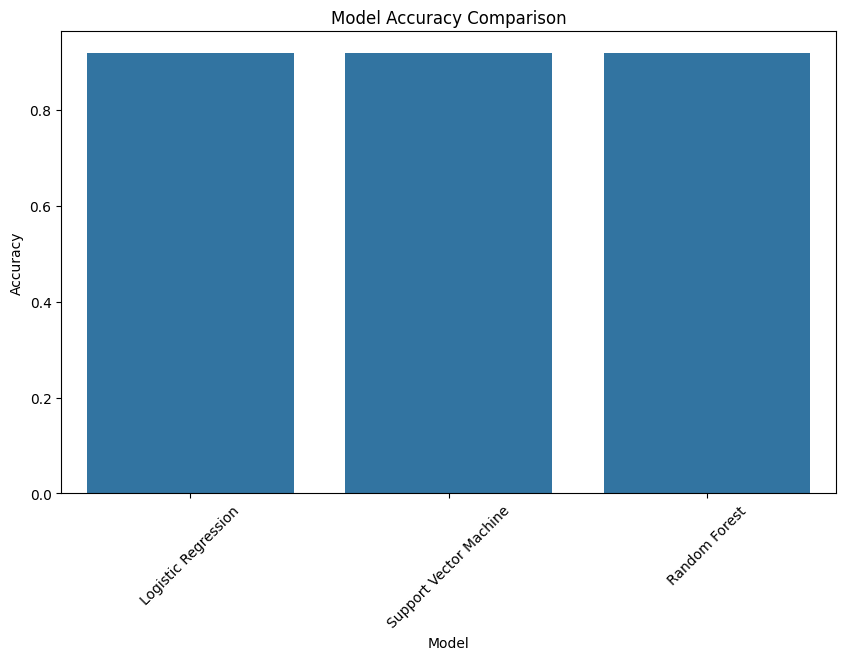

In [31]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a bar plot for accuracies
sns.barplot(x=model_names, y=accuracies)

# Set the title of the plot
plt.title('Model Accuracy Comparison')

# Label for the y-axis
plt.ylabel('Accuracy')

# Label for the x-axis
plt.xlabel('Model')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

print("\n")  # Print a newline for better readability


## Plotting the F1-Scores

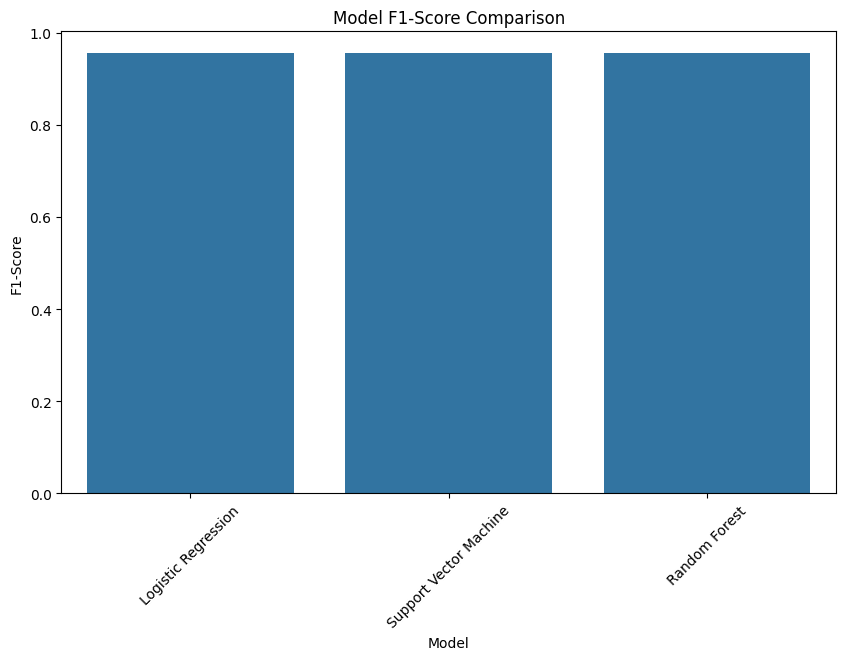

In [32]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a bar plot for F1-scores
sns.barplot(x=model_names, y=f1_scores)

# Set the title of the plot
plt.title('Model F1-Score Comparison')

 # Label for the y-axis
plt.ylabel('F1-Score')

# Label for the x-axis
plt.xlabel('Model')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

print("\n")  # Print a newline for better readability


## Plotting Confusion Matrices

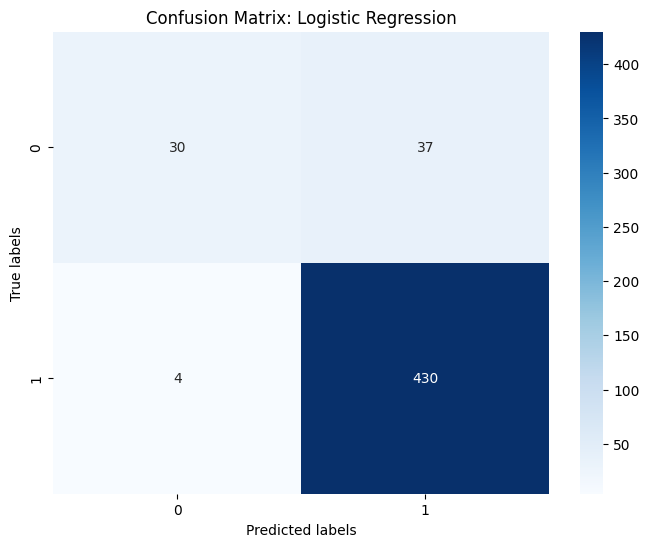

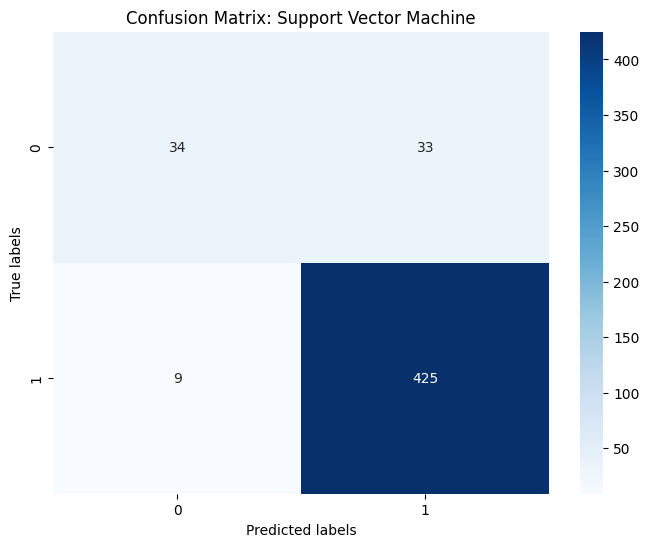

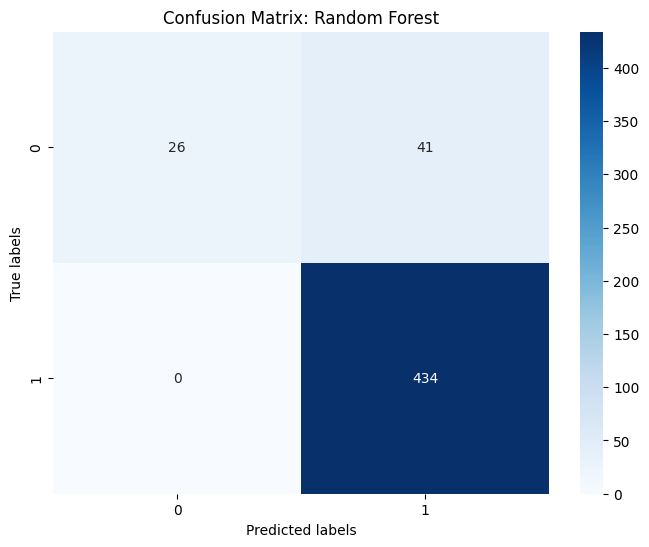

In [33]:
# Loop through each model
for name, model in models:

    # Predict the labels for the test set
    y_pred = model.predict(X_test)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)


    # Set the figure size for the heatmap
    plt.figure(figsize=(8, 6))

    # Create a heatmap of the confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

    # Set the title of the heatmap
    plt.title(f'Confusion Matrix: {name}')

    # Label for the x-axis
    plt.xlabel('Predicted labels')

    # Label for the y-axis
    plt.ylabel('True labels')

    # Display the heatmap
    plt.show()

    print("\n")  # Print a newline for a line break between each confusion matrix visualization
